# Ключевые нюансы numpy

После лекции рекомендуется ознакомиться с решением 100 задачек в numpy:
https://pythonworld.ru/numpy/100-exercises.html

In [9]:
import numpy as np
# Скорость 
my_arr = np.arange(1000000)
my_list = list(range(1000000))
# %timeit for _ in range(10): my_arr2 = my_arr * 2 
# %timeit for _ in range(10): my_list2 = list(map(lambda x: x * 2, my_list))

In [3]:
# Индексация
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print(a[0, 1])
print(a[:2, :3])
print(a[1:2, 2:3])
print(a[1:, 2:])
print(a[1, :])    
print(a[1:2, :])  
print(a[[1], :]) 
print(a[:, 1])
print(a[:, 1:2])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2
[[1 2 3]
 [5 6 7]]
[[7]]
[[ 7  8]
 [11 12]]
[5 6 7 8]
[[5 6 7 8]]
[[5 6 7 8]]
[ 2  6 10]
[[ 2]
 [ 6]
 [10]]


In [4]:
# Создание различных шаблонных массивов

# Нулевой массив 
print(np.zeros(5))
print(np.zeros((2, 4)))
print(np.zeros_like([[2,3], [1,5]]))
print(np.empty((2, 4)))
# Единичный массив
print(np.ones(5))
print(np.ones((2, 4)))
print(np.ones_like([[2,3], [1,5]]))

# Одномерный массив целочисленных положительных чисел
print(np.arange(15))

# Единичный массив / матрица
print(np.eye(2))
print(np.identity(2))

[0. 0. 0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0 0]
 [0 0]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 1. 1. 1. 1.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1 1]
 [1 1]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [5]:
# Размерность массивов
b = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(b.shape)

# Изменение размерности (умноженные размерности совпадают)
v = np.array([1,2,3]) 
print(v, "\n", v.reshape(3, 1))

print(np.arange(16).reshape(2, 4, 2))
print(np.arange(16).reshape(1, 4, 2, 2))

# Изменение размерности (новая размерность другая - заполнение нулями)
a0 = np.arange(4)
a0.resize((8,))
print(a0)

(3, 3)
[1 2 3] 
 [[1]
 [2]
 [3]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]]
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]

  [[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
[0 1 2 3 0 0 0 0]


Numpy позволяет оперировать массивами разных размерностей.
Например:

In [6]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Создаем пустой массив с той же размерностью

# Прибавляем вектор v к каждой строке матрицы x явным циклом
for i in range(4):
    y[i, :] = x[i, :] + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [7]:
vv = np.tile(v, (4, 1))  # Стакаем сверху вниз 4 копии v
print(vv) 
y = x + vv  # Складываем два массива
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Иллюстрация броадкастинга

In [8]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x.shape)
v = np.array([1, 0, 1])
print(v.shape)
v4 = np.array([1, 0, 1, 4])
y = x + v 
print(y)

(4, 3)
(3,)
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


**Вывод:** не обязательно приводить массивы к одной размерности для осуществления математических операций. Памятка по броадкастингу:
1. Если массивы не имеют одинакового ранга, размерность массива нижнего ранга изменяется с первого до тех пор, пока обе размерности не будут иметь одинаковую длину.
2. Считается, что оба массива совместимы в одном измерении, если они имеют одинаковый размер в этом измерении, или если один из массивов имеет размер 1 в этом измерении.
3. Массивы могут броадкаститься вместе, если они совместимы во всех измерениях.
4. После броадкастинга каждый массив ведет себя так, как если бы он имел размерность, равную элементарному максимуму размерности двух входных массивов.
5. В любом измерении, где один массив имеет размер 1, а другой больше 1, первый массив ведет себя так, как если бы он был скопирован по этому измерению.

Документация:

https://numpy.org/doc/stable/user/basics.broadcasting.html

In [9]:
# Сортировка

c = np.array([[4, 3, 5], [1, 2, 1]])
print(np.sort(c, axis=1))

# Возвращает индексы элементов, которые были отсортированы 
j = np.argsort(c)
print(j)
print(c[:, j])

[[3 4 5]
 [1 1 2]]
[[1 0 2]
 [0 2 1]]
[[[3 4 5]
  [4 5 3]]

 [[2 1 1]
  [1 1 2]]]


In [10]:
print(np.array([[1,3,5],[5,4,5],[1,2,10],[5,4,6]]).argpartition(kth = 2, axis = 1))
print(np.array([[10,3,5, 3],[5,4,5, 5],[1,2,10, 7],[5,4,6, 15]]).argsort(axis=1))

[[0 1 2]
 [1 0 2]
 [0 1 2]
 [1 0 2]]
[[1 3 2 0]
 [1 0 2 3]
 [0 1 3 2]
 [1 0 2 3]]


In [11]:
# Условия и циклы
for i in np.array([[1,2,3],[4,5,6]]):
    print(i)
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(data)
print(data[names == "Bob"])
print(data[names == 'Bob', 2:])

[1 2 3]
[4 5 6]
[[-0.22236702  1.53039652  1.21048547 -0.48386638]
 [-2.52453485  0.87142975  0.33475401  1.02366059]
 [-1.72122445 -1.21893447  2.79510352 -0.12567316]
 [ 2.10442341  0.02055312  0.88330036 -0.80537704]
 [ 0.06381348  0.20230835  0.87450259  0.54041368]
 [-0.51969933 -0.79921701  0.70735145 -1.68357774]
 [-0.13597121  0.44354722  0.91243819 -1.87058599]]
[[-0.22236702  1.53039652  1.21048547 -0.48386638]
 [ 2.10442341  0.02055312  0.88330036 -0.80537704]]
[[ 1.21048547 -0.48386638]
 [ 0.88330036 -0.80537704]]


In [12]:
# Присвоение по условию (если, то)
np.where(data, data>0, 0)

array([[0, 1, 1, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 1, 0],
       [0, 1, 1, 0]])

In [13]:
# Слияние массивов
x,y,z = np.arange(1,3), np.arange(3,5), np.arange(5,7)
print(np.concatenate([x,y,z]))

array2D_1 = np.array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])
array2D_2 = np.array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

# Вертикальное слияние
print(f"Вертикальное : \n {np.vstack((array2D_1, array2D_2))}")

# Горизонтальное слияние
print(f"Горизонтальное : \n {np.hstack((array2D_1, array2D_2))}")

[1 2 3 4 5 6]
Вертикальное : 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [10 11 12]
 [13 14 15]
 [16 17 18]]
Горизонтальное : 
 [[ 0  1  2 10 11 12]
 [ 3  4  5 13 14 15]
 [ 6  7  8 16 17 18]]


In [14]:
# Применение функции к разным осям массива
m = np.random.randn(3,2)
# Сначала указываем функцию, потом по какой оси, а затем указываем сам массив
print(np.apply_along_axis(lambda x: sum(x ** 2), 1, m)) 
print(np.apply_along_axis(lambda x: sum(x ** 2), 0, m)) 
# Обратим внимание, что у функции может быть только один аргумент - это значения массива из конкретной оси

[0.93559384 0.15759632 0.75450153]
[1.68452406 0.16316763]


In [15]:
# Траблы с округлением при сравнении
np.round(0.3, 17) == np.round(3 * 0.1, 17)

False

In [16]:
# Используем такую функцию, чтобы проверить, равны ли массивы
np.allclose(0.3, 3*0.1)

True

In [17]:
# Сетка для графического отображения
Z = np.zeros((10,10), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,10),
                             np.linspace(0,1,10))
print(Z[:5, :5])
print(Z.shape)

[[(0.        , 0.        ) (0.11111111, 0.        )
  (0.22222222, 0.        ) (0.33333333, 0.        )
  (0.44444444, 0.        )]
 [(0.        , 0.11111111) (0.11111111, 0.11111111)
  (0.22222222, 0.11111111) (0.33333333, 0.11111111)
  (0.44444444, 0.11111111)]
 [(0.        , 0.22222222) (0.11111111, 0.22222222)
  (0.22222222, 0.22222222) (0.33333333, 0.22222222)
  (0.44444444, 0.22222222)]
 [(0.        , 0.33333333) (0.11111111, 0.33333333)
  (0.22222222, 0.33333333) (0.33333333, 0.33333333)
  (0.44444444, 0.33333333)]
 [(0.        , 0.44444444) (0.11111111, 0.44444444)
  (0.22222222, 0.44444444) (0.33333333, 0.44444444)
  (0.44444444, 0.44444444)]]
(10, 10)


# Линейная алгебра

#### np

**diag** - вернуть диагональные (или недиагональные) элементы квадратной матрицы в виде 1D-массива, или преобразовать 1D-массив в квадратную матрицу с нулями на остальных элементах.

**dot, @** - матричное умножение

**trace** - вычислить сумму диагональных элементов (след матрицы)

#### linalg

**det** - определитель матрицы.

**eig** - вычислить собственные значения и собственные векторы квадратной матрицы.  

**inv** - вычислить обратную  матрицу любой квадратной матрицы (определитель должен быть не равен нулю)

**svd** - вычислить сингулярное разложение значений (SVD).

**solve** решение линейной системы уравнений Ax = b для x, где A - квадратная матрица. 

**lstsq** - вычислить оценки методом наименьших квадратов для Ax = b

In [18]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
w, v = np.linalg.eig(x)
print(np.allclose(x @ v[:, 0], w[0]*v[:, 0]))

True


In [19]:
from numpy.linalg import inv, det
mat = np.random.randn(5, 5)
print(inv(mat))
print(det(mat))

[[ 0.24547418 -0.49912974  0.14507905 -0.05125712 -0.13836301]
 [-1.44467921  1.43548245  0.60325032 -1.05864694 -0.71409851]
 [-0.92215927  1.7802998   0.5926479  -1.81477115 -0.69265463]
 [ 3.84040615 -6.9899482  -3.16001714  4.72921152  2.06802784]
 [-1.20997605  2.65559261  1.09536573 -1.838506   -0.97186472]]
-2.301920345000651


# Генеральная совокупность и выборка

Допустим, что перед нами стоит задача выявить средний рост жителей Москвы.
В идеальном варианте нам нужно измерить абсолютно каждого жителя и посчитать
среднее арифметическое. Однако, этот способ довольно затратный и
статистики придумали способ попроще.

Для решения такой задачи вполне достаточно собрать *репрезентативную выборку*,
которая отражает нашу *генеральную совокупность данных* (всех реальных
жителей города). Таким образом, реальное распределение роста всех
жителей Москвы будет нашим *теоретическим распределением* с некоторым
математическим ожиданием, которое и соответствует реальному среднему росту
москвичей. Значения роста жителей Москвы по *выборке* будет представлять собой
*эмпирическое распределение* роста по нашим наблюдениям, а среднее
арифметическое будет являться хорошей оценкой для среднего роста всех
жителей.

Таким образом, для того, чтобы сделать вывод относительно любой генеральной
совокупности, нам достаточно правильно собрать репрезентативную выборку
и посчитать все необходимые статистики. Величины в статистике подразделяются
на *теоретические* (какие они есть в реальности) и *выборочные* (то, что
мы получаем согласно нашим наблюдениям).


## Основные характеристики в теории вероятностей

В теории вероятностей мы имеем дело с вероятностью события в пространстве
элементарных исходов. Отсюда возникает понятие теоретического распределения
случайной величины (в примере выше это было распределение роста всех
жителей Москвы). Ниже приведем основные числовые характеристики случайных
величин.

## Основные теоретические характеристики в статистике:

$ \mathbb{E}(x) = \sum_i p_i x_i $

$ Var(x) =  \mathbb{E}((x - \mathbb{E}(x) ^ 2)$

$ \sigma = \sqrt{Var(x)} $

$ Cov(x,y) = \mathbb{E}((x - \mathbb{E}(x)) * ((x - \mathbb{E}(y)) $ - мера связи между переменными. НО! Ковариация является безразмерной величиной

$ Corr(x,y) = \frac {Cov(x,y)} {\sigma(x) \cdot \sigma(y)} $ - мера тесноты линейной связи между двумя переменными


## Основные выборочные характеристики в статистике:

$ \bar{x} = \frac {\sum_i {x_i}} {n} $

$ \sigma^2 = \frac {\sum_i  {(x_i - \bar{x})^2}} {n} $

$ \sigma = \sqrt{\sigma^2} $

$ Cov(x,y) = \frac{1}{n}\sum_i  {[(x_i - \bar{x}) \cdot (y_i - \bar{y})]} $ - мера связи между переменными. НО! Ковариация является безразмерной величиной

$ Corr(x,y) = \frac {Cov(x,y)} {\sigma(x) \cdot \sigma(y)} $ - мера тесноты линейной связи между двумя переменными

##### Всегда помните: КОРРЕЛЯЦИЯ НЕ ОЗНАЧАЕТ ПРИЧИННО-СЛЕДСТВЕННУЮ СВЯЗЬ МЕЖДУ ПЕРЕМЕННЫМИ!!!

In [20]:
# Случайные величины
x = np.random.random_sample((1, 100))
y = np.random.random_sample((1, 100))

print(f"Выборочное среднее = {x.mean(), y.mean()}")
print(f"Выборочная дисперсия = {x.var(), y.var()}")
print(f"Выборочное стандартное отклонение = {x.std(), y.std()}")

Выборочное среднее = (0.4453674408848716, 0.5418575371785995)
Выборочная дисперсия = (0.08421453790651726, 0.09163812315703838)
Выборочное стандартное отклонение = (0.2901974119569595, 0.30271789368492635)


In [21]:
# Ковариационная матрица
np.cov(x, y)

array([[ 0.08506519, -0.00744958],
       [-0.00744958,  0.09256376]])

In [22]:
# Корреляционная матрица
np.corrcoef(x, y)



array([[ 1.        , -0.08395281],
       [-0.08395281,  1.        ]])

# Основные распределения в статистике

In [23]:
import math

## Дискретные

### Биномиальное распределение

$$  P(X = x) = {n\choose x} p^x (1-p)^{n-x}, $$

где ***n*** - количество испытаний, ***p*** - вероятность успеха,
***x*** - количество успешных испытаний (случайная величина)

In [24]:
def binomial_prob(n, p, x):
    b = (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))*(p**x)*((1-p)**(n-x))
    return b
prob_binom = 0
# Вероятность того, что количество успешных испытаний будет менее или равно 30
for x in range(31):
    prob_binom += binomial_prob(n=100, p=0.3, x=x)
print(prob_binom)


0.5491236007687873


Вероятность ровно 45 раз успешно выполнить испытание (плотность вероятности)= 0.048474296626430755
Вероятность 45 раз и менее успешно выполнить испытание (кумулятивная вероятность)= 0.18410080866334774
То же самое, только по выборке : 0.043333333333333335
То же самое, только по выборке : 0.21


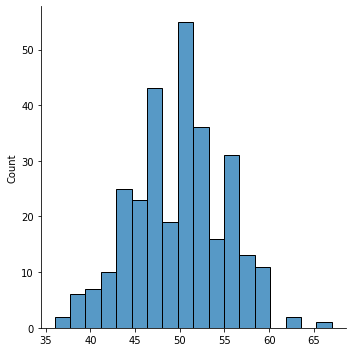

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# Моделируем распределение случайной величины Бернулли (по Биномиальному закону)
# В данном случае - подбрасывание монетки (сколько выпадет орлов)
# n - количество испытаний для одной случайной величины (n раз подбросим монетку)
# size - количество случайных величин Бернулли (сколько испытаний будет проведено
#- сколько раз по n раз мы будем подбрасывать монетку)

# p - вероятность успеха (в нашем случае - 50%)
# Результат метода rvs будет количество успешных испытаний для каждой случайной величины
from scipy.stats import binom
monetka = binom.rvs(size=300, p=0.5, n=100)
sns.displot(monetka, kde=False);

print(f"Вероятность ровно 45 раз успешно выполнить испытание (плотность вероятности)= "
      f"{binom.pmf(k=45, n=100, p=0.5)}")
print(f"Вероятность 45 раз и менее успешно выполнить испытание "
      f"(кумулятивная, накопленная вероятность)= "
      f"{binom.cdf(k=45, n=100, p=0.5)}")

print(f"Плотность вероятности по выборке : {monetka[monetka == 45].shape[0] / monetka.shape[0]}")
print(f"Кумулятивная накопленная вероятность по выборке : {monetka[monetka <= 45].shape[0] / monetka.shape[0]}")



Отличие в том, что в первом случае мы берем вероятности из ***теоретического распределения***, а во втором -
из ***эмпирического***

### Распределение Пуассона
$$  P(X = x) = \frac{\mu^x * \exp^{-\mu}}{x!}, $$
where $\mu = n*p$

Данное распределение приближает распределение Бернулли
для маловероятных событий (p мало) в больших выборках (n велико)

In [37]:
from math import exp, factorial
def poisson_prob(n, p, x):
    mu = n * p
    return ((mu**x) * exp(-mu)) / factorial(x)
n, p, x = 500, 0.05, 25
print(f"Вероятность для распределения Пуассона при БОЛЬШОМ n = {poisson_prob(n, p, x)}")
print(f"Вероятность для распределения Бернулли при БОЛЬШОМ n = {binomial_prob(n, p, x)}")

n, p, x = 30, 0.05, 5
print(f"Вероятность для распределения Пуассона при МАЛОМ n = {poisson_prob(n, p, x)}")
print(f"Вероятность для распределения Бернулли при МАЛОМ n = {binomial_prob(n, p, x)}")

Вероятность для распределения Пуассона при БОЛЬШОМ n = 0.07952295146806546
Вероятность для распределения Бернулли при БОЛЬШОМ n = 0.0815881110121301
Вероятность для распределения Пуассона при МАЛОМ n = 0.014119955446892825
Вероятность для распределения Бернулли при МАЛОМ n = 0.012353024533531267


5% квантиль = 2.0
Согласно нашему смоделированному распределению Пуассона, 5% квантиль = 2.0


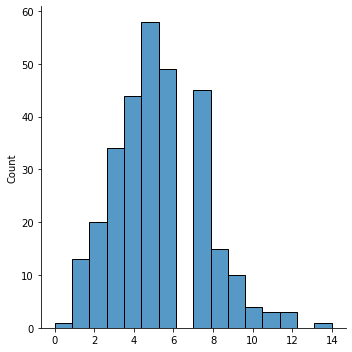

In [39]:
from scipy.stats import poisson
pois_distr = poisson.rvs(size=300, mu=100 * 0.05)
sns.displot(pois_distr);

# Вытащим 5% квантиль распределения Пуассона готовым методом

print(f"5% квантиль = {poisson.ppf(mu=100 * 0.05, q=0.05)}")
# Левее данного числа расположены 5% всех значений для данного распределения
print(f"Согласно нашему смоделированному распределению Пуассона, 5% квантиль = \
{np.quantile(pois_distr, 0.05)}")

Квантиль уровня p - это такое число, левее которого площадь под кривой
как раз составляет p% от всей кривой (накопленная вероятность).

### Геометрическое распределение
$$  P(X = x) = (1-p)^{x-1} * p, $$

Данное распределение повторяет схему независимых испытаний Бернулли до первого успешного испытания


In [43]:
def geometric_prob(p, x):
    g = (1-p)**(x-1) * p
    return g
p, x = 0.05, 10
print(f"Вероятность успеха на десятой попытке: {geometric_prob(p, x)}")

prob_geom = 0
for x in range(10):
    prob_geom += geometric_prob(p=p, x=x)
print(f"Вероятность того, что успех случится на 10 испытании или раньше: {prob_geom}")

Вероятность успеха на десятой попытке: 0.03151247048623045
Вероятность того, что успех случится на 10 испытании или раньше: 0.422382169222759


Counter({2: 41,
         5: 28,
         7: 14,
         1: 68,
         10: 10,
         4: 32,
         6: 17,
         17: 3,
         3: 36,
         8: 6,
         11: 9,
         15: 5,
         24: 3,
         13: 2,
         21: 2,
         9: 8,
         12: 6,
         16: 3,
         14: 1,
         22: 1,
         23: 1,
         20: 3,
         19: 1})

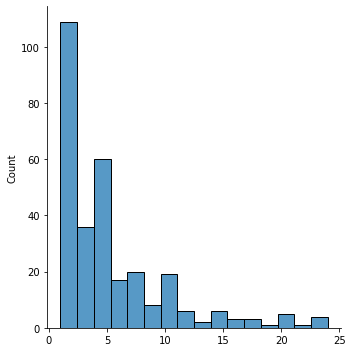

In [3]:
from scipy.stats import geom
geom_dist = geom.rvs(size=300, p=0.2)
sns.displot(geom_dist);

from collections import Counter
Counter(geom_dist)

## Непрерывные

Число возможных значений несчетно (бесконечное)

### Экспоненциальное (показательное)

$$ f(x) = \lambda \exp^{-\lambda x}, x > 0$$

Позволяет моделировать интервалы времени между наступлением событий. Представляет из себя распределение вероятности времени между событиями в случайном распределении Пуассона.
Подробнее: https://medium.com/nuances-of-programming/экспоненциальное-распределение-восприятие-происхождение-применение-33d689e01de5

In [49]:
from scipy.stats import expon
def expon_prob(lambda_, x):
    g = lambda_ * math.exp(-lambda_ * x)
    return g
# Зададим параметры для lambda
# Пусть в районе живет 100 человек. Вероятность в течение 60 минут зайти в магазин = 5%.
n=100; p=0.05
lambda_ = n * p
print(f"Средний временной интервал между двумя людьми, зашедшими в магазин = {int(60/lambda_)} минут")
print(f"Вероятность того, что временной интервал между людьми составит 20 минут = "
      f"{expon.cdf(x=20, scale = 60/lambda_)}")

Средний временной интервал между двумя людьми, зашедшими в магазин = 12 минут
Вероятность того, что временной интервал между людьми составит 20 минут = 0.8111243971624382


### Равномерное распределение

$$ f(x) = \cases{p, x \in [a,b] \\ 0, x \notin [a,b]}  $$

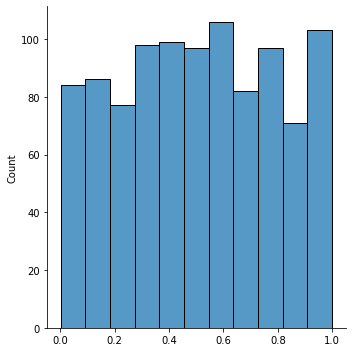

In [5]:
from scipy.stats import uniform
sns.displot(uniform.rvs(size=1000));

Несмотря на то, что столбики не одинаковы, теоретическая вероятность
события все равно равняется 0.5. (1-0 / 2)

### Нормальное распределение

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

где $\mu$ - математическое ожидание, $\sigma^2$ - дисперсия

In [53]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://s3.nat-geo.ru/images/2019/4/10/08f4d4f5dec34925a7384c03b2de85b1.max-2000x1000.jpg")

### Стандартное нормальное распределение
$$ f(x) = \frac{1}{\sqrt{2\pi}} \exp^{-\frac{x^2}{2}} $$

где в предыдущей формуле $\mu=0$ (математическое ожидание),
$\sigma$ = 1 (дисперсия)

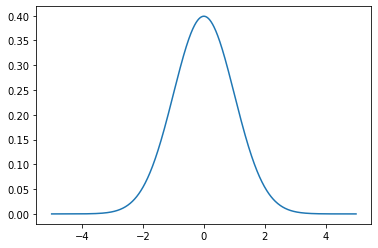

In [57]:
def normal_distr(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2*math.pi)) * np.exp(-((x - mu)**2 / (2 * sigma**2) ))
x = np.linspace(-5,5, 1000)
y = normal_distr(x)
plt.plot(x, y);

5% квантиль нормального распределения = -1.6448536269514729
95% квантиль нормального распределения = 1.6448536269514722
97.5% квантиль нормального распределения = 1.959963984540054
97.5% квантиль нормального распределения c размером size = 1000000 равен 1.9567144553275477
Вероятность того, что случайная величина примет значение 1.96 или меньше = 0.9750021048517795


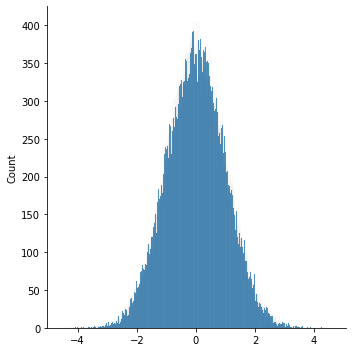

In [10]:
from scipy.stats import norm
sns.displot(norm.rvs(size=10**5), bins=1000)
print(f"5% квантиль нормального распределения = {norm.ppf(0.05)}")
print(f"95% квантиль нормального распределения = {norm.ppf(0.95)}")
print(f"97.5% квантиль нормального распределения = {norm.ppf(0.975)}")
size_normal = 10**6
print(f"97.5% квантиль нормального распределения c размером size = {size_normal} равен \
{np.quantile(norm.rvs(size=size_normal), 0.975)}")
print(f"Вероятность того, что случайная величина примет значение 1.96 или меньше = {norm.cdf(1.96)}")

### Хи-квадрат распределение
$\chi_p^2 = \sum_p\xi_p^2$,

где $$\xi \in N(0,1)$$ - случайная величина, имеющая стандартное нормальное распределение

In [8]:
from scipy.stats import norm, chi2
def chi_distr(df=1):
    return np.sum(norm.rvs(size=df)**2)

# Генерируем Хи-квадрат распределение согласно определению
size_chi, df = 10**5, 10 # Всего 1 млн значений для 10 степеней свободы
Chi2_values = [chi_distr(df=df) for _ in range(size_chi)]


# Воспользуемся генерацией из готового пакета - теоретическое распределение
from scipy.stats import chi2
Chi_values_rvs = chi2.rvs(df=df, size=size_chi)

# Сравним графики плотностей распределения
sns.displot(Chi2_values);
sns.displot(Chi_values_rvs);
print(f"97.5% квантиль распределения теоретического распределения Хи-квадрат"
      f"= {chi2.ppf(df=df, q=0.975)}")
print(f"97.5% квантиль эмпирического распределения Хи-квадрат"
      f"= {np.quantile(Chi2_values, 0.975)}")


NameError: name 'np' is not defined

### t-распределение Стьюдента

***Для малых n - более тяжелые хвосты, чем у нормального распределения***

***Для больших n - почти идентично нормальному***

$$t_p = \frac{\xi_0}{\sqrt{\chi_p^2/p}}$$

$\xi_0$ ~ N(0,1) - случайная величина, имеющая стандартное нормальное распределение,

$\chi_p^2$ - случайная величина, имеющая распределение Хи-квадрат

97.5% квантиль теоретического распределения Стьюдента = 2.2281388519649385
97.5% квантиль эмпирического распределения Стьюдента полученного полуручным способом = 2.214193691393817
97.5% квантиль эмпирического распределения Стьюдента полученного ручным способом = 2.2206965978518265


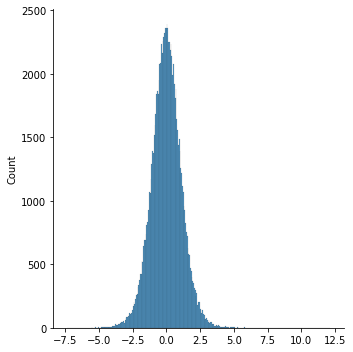

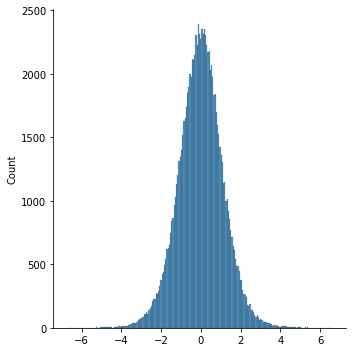

In [11]:
def t_distr(df=1):
    return (norm.rvs(size=1) / np.sqrt(chi_distr(df) / df))[0]

# Генерируем распределение Стьюдента согласно определению
size_t, df = 10**5, 10 # Всего 1 млн значений для 10 степеней свободы
t_values = [t_distr(df=df) for _ in range(size_t)]

# Воспользуемся генерацией из готового пакета
import scipy.stats as sts
t_values_rvs = sts.t.rvs(size=size_t, df=df)

# Сравним графики плотностей распределения
sns.displot(t_values);
sns.displot(t_values_rvs);

print(f"97.5% квантиль теоретического распределения Стьюдента = "
      f"{sts.t.ppf(df=df, q=0.975)}")
print(f"97.5% квантиль эмпирического распределения Стьюдента полученного полуручным способом = "
      f"{np.quantile(t_values_rvs, 0.975)}")
print(f"97.5% квантиль эмпирического распределения Стьюдента полученного ручным способом = "
      f"{np.quantile(t_values, 0.975)}")

### F-распределение Фишера
$$ F_{d_1, d_2} = \frac{\chi^2_{d_1}/d_1} {\chi^2_{d_2}/d_2} $$

$\chi^2_{d_1}, \chi^2_{d_2}$ - случайные величины, имеющие Хи-квадрат распределение
с d1 и d2 степенями свободы

97.5% квантиль теоретического распределения Фишера = 3.1286844836294967
97.5% квантиль эмпирического распределения Фишера полученного полуручным способом =3.1842511260855413
97.5% квантиль эмпирического распределения Фишера полученного ручным способом = 3.1842511260855413


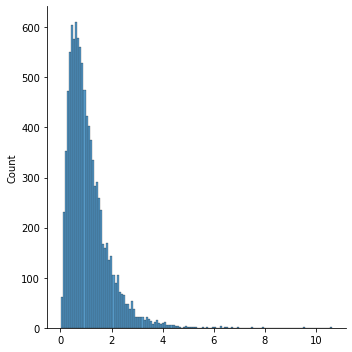

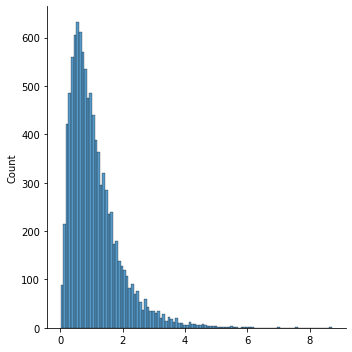

In [63]:
def F_distr(df1=1, df2=1):
    return (chi_distr(df1)/df1) / (chi_distr(df2)/df2)

# Генерируем распределение Фишера согласно определению
size_F, df1, df2 = 10**4, 5, 25 # Всего 1 млн значений для степеней свободы 5 и 5
F_values = [F_distr(df1=df1, df2=df2) for _ in range(size_F)]

# Воспользуемся генерацией из готового пакета
import scipy.stats as sts
F_values_rvs = sts.f.rvs(size=size_F, dfn=df1, dfd=df2)

# Сравним графики плотностей распределения
sns.displot(F_values)
sns.displot(F_values_rvs)

print(f"97.5% квантиль теоретического распределения Фишера = "
      f"{sts.f.ppf(dfn=df1, dfd=df2, q=0.975)}")
print(f"97.5% квантиль эмпирического распределения Фишера полученного полуручным способом = "
      f"{np.quantile(F_values_rvs, 0.975)}")
print(f"97.5% квантиль эмпирического распределения Фишера полученного ручным способом = "
      f"{np.quantile(F_values_rvs, 0.975)}")

# Случайные величины в numpy
Случайные числа в numpy на самом деле не такие уж и случайные.
В зависимости от типа случайности выдаются одни и те же значения.

In [29]:
np.random.seed(1) # определить тип псевдослучайных чисел
print(f"Средние для сида в 1: {np.random.normal(loc=0, scale=1, size=(300, 2)).mean(axis=0)}")   # стандартное нормальное распределение

np.random.seed(2) # определить тип псевдослучайных чисел
print(f"Средние для сида в 2: {np.random.normal(loc=0, scale=1, size=(300, 2)).mean(axis=0)}")   # стандартное нормальное распределение

Средние для сида в 1: [0.05593271 0.07499207]
Средние для сида в 2: [-0.02298815 -0.06120652]


In [47]:
binom = np.random.binomial(n=100, p=0.2, size=100) # Биномиальное
poison = np.random.poisson(lam=2, size=100) # Пуассон
geom = np.random.geometric(p=0.2, size=100) # Геометрическое

beta = np.random.beta(a=1, b=1, size=100)  # Бета-распределение - вероятность в испытаниях бернули
chi = np.random.chisquare(df=1, size=100) # Хи-квадрат
normal_st = np.random.standard_normal(size=100)  # Cтандартное нормальное
normal = np.random.normal(loc=1, scale=2, size=100) # Нормальное
student = np.random.standard_t(df=5, size=100) # Стьюдент
expon = np.random.exponential(scale=2, size=100) # Экспоненциальное

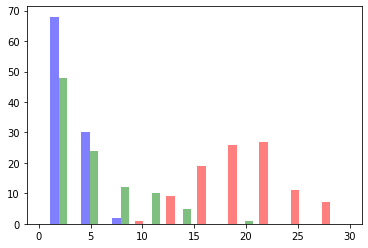

In [42]:
plt.hist([binom, poison, geom], color=['r','b', 'g'], alpha=0.5);

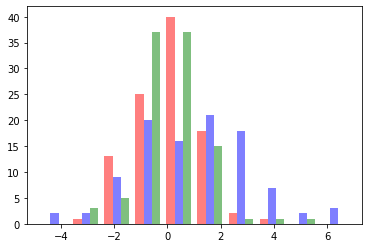

In [48]:
plt.hist([normal_st, normal, student], color=['r','b', 'g'], alpha=0.5);

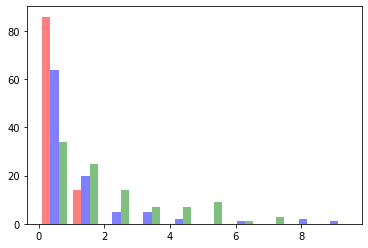

In [49]:
plt.hist([beta, chi, expon], color=['r','b', 'g'], alpha=0.5);
